<a href="https://colab.research.google.com/github/JSEFERINO/Estadistica_Moderna/blob/main/143_DCGL_FORM5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Librerías Básicas para Diseño de Experimentos**

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.formula.api as smf
import scipy.stats as stats


### **Problema 05. Estudio de las Formulaciones de Carga Propulsora.**

+ _Un experimentador estudia los efectos que tienen cinco formulaciones diferentes de la carga propulsora (A, B, C, D, E) utilizadas en los sistemas de expulsión de la tripulación de un avión, basándose en la rapidez de combustión._

+ _Cada formulación se hace con un **lote de materia prima** diferente (Columnas: 1, 2, 3, 4, 5, 6), el cual solo alcanza para probar cinco formulaciones. Además, las formulaciones son preparadas por varios **operadores** (Filas: 1, 2, 3, 4, 5, 6), y puede haber diferencias sustanciales en las habilidades y experiencia de cada uno de ellos. Por tanto, hay dos factores perturbadores que serán "calculados en promedio" en dicho diseño: **los lotes de materia prima** y **los operadores**._

+ _El diseño apropiado para este problema consiste en probar cada formulación exactamente una vez en cada uno de los operadores. Para esto, se parte del diseño de un **Cuadrado Latino**._

* _Luego de realizar el análisis del experimento del cuadrado latino, se supone que existe un **factor adicional**, los **montajes de prueba** (denotados por letras griegas), que podría ser importante. Este factor considera 5 montajes de prueba diferentes denotados por letras griegas._

+ **Los Datos**. A continuación se presenta el **diseño cuadrado grecolatino** resultante:

---

### Tabla 6. Diseño en Cuadro Grecolatino

| Operador \ Lote | 1        | 2        | 3        | 4        | 5        |
|-----------------|----------|----------|----------|----------|----------|
| **1**           | Aα = 24  | Bγ = 20  | Cε = 19  | Dβ = 24  | Eδ = 24  |
| **2**           | Bβ = 17  | Cδ = 24  | Dα = 30  | Eγ = 27  | Aε = 36  |
| **3**           | Cγ = 18  | Dε = 38  | Eβ = 26  | Aδ = 27  | Bα = 21  |
| **4**           | Dδ = 26  | Eα = 31  | Aγ = 26  | Bε = 23  | Cβ = 22  |
| **5**           | Eε = 22  | Aβ = 30  | Bδ = 20  | Cα = 29  | Dγ = 31  |

---

+ **Este diseño permite analizar el efecto de las formulaciones, considerando los efectos promedio de los lotes de materia prima, operadores y montajes de prueba, eliminando la influencia de estos factores perturbadores.**

## **El **diseño grecolatino****
+ Es una extensión del **diseño cuadrado latino**, que se utiliza para controlar tres factores en un experimento. Este diseño equilibra las influencias de los tres factores, evitando que interfieran en los resultados de la variable de interés (en este caso, la rapidez de combustión).

+ En un diseño grecolatino, hay tres factores que se balancean:

1. **Tratamientos** (formulaciones A, B, C, D, E).
2. **Lotes de materia prima** (1, 2, 3, 4, 5).
3. **Operadores** (personas que preparan las formulaciones).

+ Se introduce un cuarto factor adicional, en este caso, los **montajes de prueba** (letras griegas: α, β, γ, δ, ε), que también se balancea. Cada combinación de estos factores aparece una vez en el diseño, lo que permite aislar sus efectos y analizar el impacto de los tratamientos sin que los demás factores influyan en los resultados.

+ Este tipo de diseño es útil para reducir el error experimental y aumentar la precisión del análisis cuando hay múltiples fuentes de variación.

In [108]:
# @title **1. Crear el DataFrame con los datos del diseño cuadrado grecolatino**
# Crear el DataFrame con los datos proporcionados
data = {
'Operador': [1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4,
            4, 4, 5, 5, 5, 5, 5],
'Lote': [1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4,
          5, 1, 2, 3, 4, 5],
'Formulacion': ['A', 'B', 'C', 'D', 'E', 'B', 'C', 'D', 'E', 'A',
                'C', 'D', 'E', 'A', 'B', 'D', 'E', 'A', 'B', 'C', 'E', 'A', 'B', 'C',
                'D'],
'Montaje': ['α', 'γ', 'ε', 'β', 'δ', 'β', 'δ', 'α', 'γ', 'ε', 'γ',
          'ε', 'β', 'δ', 'α', 'δ', 'α', 'γ', 'ε', 'β', 'ε', 'β', 'δ', 'α', 'γ'],
'Respuesta': [24, 20, 19, 24, 24, 17, 24, 30, 27, 36, 18, 38, 26,
            27, 21, 26, 31, 26, 23, 22, 22, 30, 20, 29, 31]
}

# Crear el DataFrame
DCGL = pd.DataFrame(data)

# Mostrar el DataFrame
DCGL.head()


,Operador,Lote,Formulacion,Montaje,Respuesta
0,1,1,A,α,24
1,1,2,B,γ,20
2,1,3,C,ε,19
3,1,4,D,β,24
4,1,5,E,δ,24


In [109]:
# @title **2. Visualizando el DataFrame**
DCGL


,Operador,Lote,Formulacion,Montaje,Respuesta
0,1,1,A,α,24
1,1,2,B,γ,20
2,1,3,C,ε,19
3,1,4,D,β,24
4,1,5,E,δ,24
5,2,1,B,β,17
6,2,2,C,δ,24
7,2,3,D,α,30
8,2,4,E,γ,27
9,2,5,A,ε,36


<Axes: title={'center': 'Respuesta vs Operador'}, xlabel='Operador', ylabel='Respuesta'>

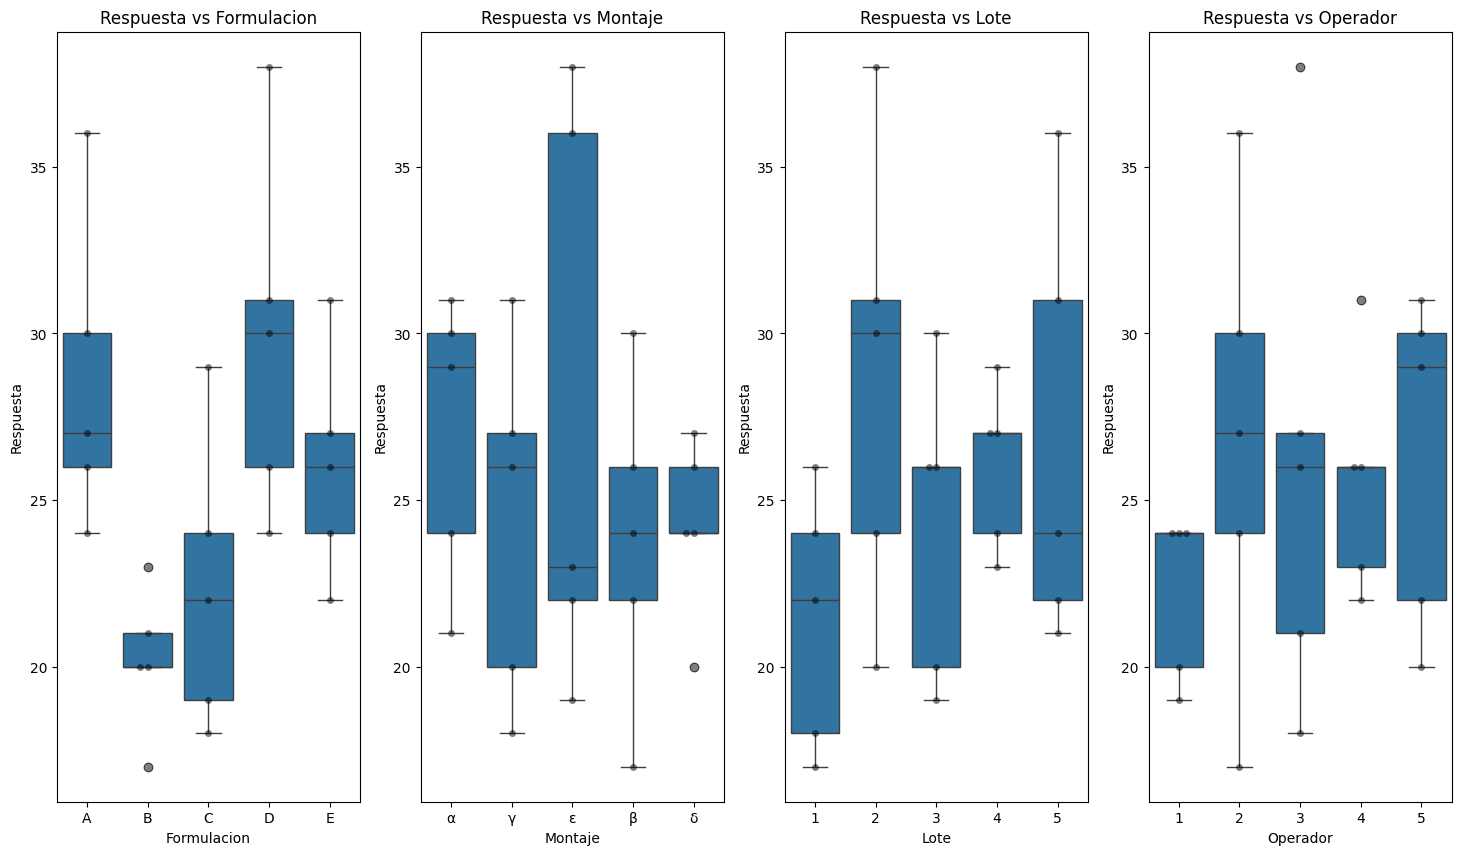

In [110]:
# @title **3. BoxPlot para el DCGL**
fig, axs = plt.subplots(1, 4, figsize=(18, 10))
axs[0].set_title('Respuesta vs Formulacion')
sns.boxplot(x="Formulacion", y="Respuesta", data=DCGL, ax=axs[0])
sns.swarmplot(x="Formulacion", y="Respuesta", data=DCGL, color='black',
              alpha = 0.5, ax=axs[0])

axs[1].set_title('Respuesta vs Montaje')
sns.boxplot(x="Montaje", y="Respuesta", data=DCGL, ax=axs[1])
sns.swarmplot(x="Montaje", y="Respuesta", data=DCGL, color='black',
              alpha = 0.5, ax=axs[1])
axs[2].set_title('Respuesta vs Lote')
sns.boxplot(x="Lote", y="Respuesta", data=DCGL, ax=axs[2])
sns.swarmplot(x="Lote", y="Respuesta", data=DCGL, color='black',
              alpha = 0.5, ax=axs[2])

axs[3].set_title('Respuesta vs Operador')
sns.boxplot(x="Operador", y="Respuesta", data=DCGL, ax=axs[3])
sns.swarmplot(x="Operador", y="Respuesta", data=DCGL, color='black',
              alpha = 0.5, ax=axs[3])

<Axes: title={'center': 'Respuesta vs Operador'}, xlabel='Operador', ylabel='Respuesta'>

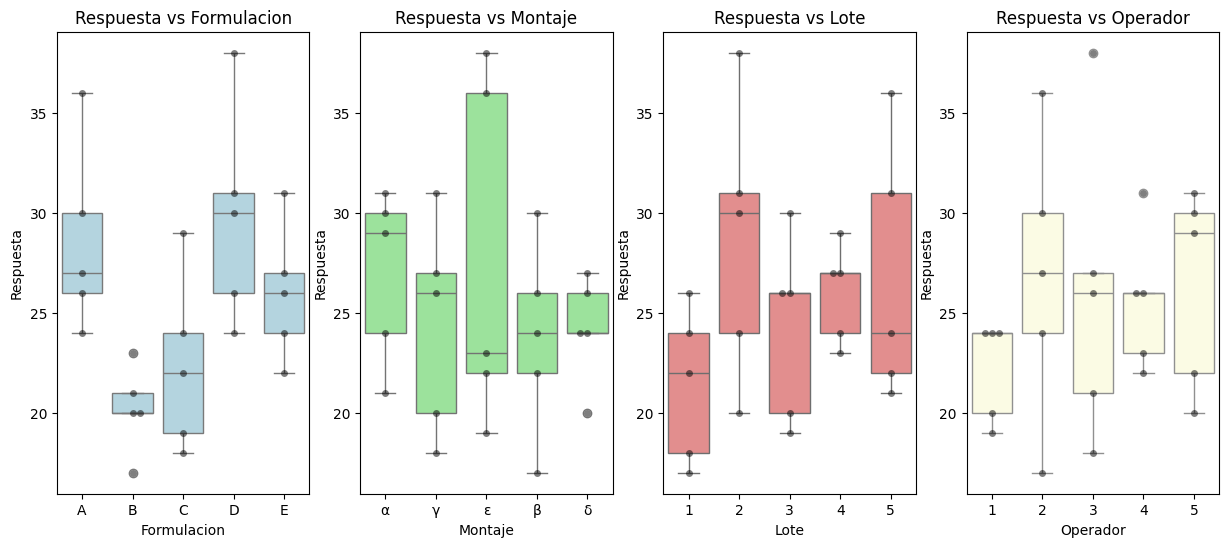

In [111]:


# @title **4. BoxPlot para el DCGL - Mejondo colores**
fig, axs = plt.subplots(1, 4, figsize=(15, 6))
axs[0].set_title('Respuesta vs Formulacion')
sns.boxplot(x="Formulacion", y="Respuesta", data=DCGL, ax=axs[0], color='lightblue')  # Cambiar color de las cajas
sns.swarmplot(x="Formulacion", y="Respuesta", data=DCGL, color='black',
              alpha = 0.5, ax=axs[0])

axs[1].set_title('Respuesta vs Montaje')
sns.boxplot(x="Montaje", y="Respuesta", data=DCGL, ax=axs[1], color='lightgreen')  # Cambiar color de las cajas
sns.swarmplot(x="Montaje", y="Respuesta", data=DCGL, color='black',
              alpha = 0.5, ax=axs[1])
axs[2].set_title('Respuesta vs Lote')
sns.boxplot(x="Lote", y="Respuesta", data=DCGL, ax=axs[2], color='lightcoral')  # Cambiar color de las cajas
sns.swarmplot(x="Lote", y="Respuesta", data=DCGL, color='black',
              alpha = 0.5, ax=axs[2])

axs[3].set_title('Respuesta vs Operador')
sns.boxplot(x="Operador", y="Respuesta", data=DCGL, ax=axs[3], color='lightyellow')  # Cambiar color de las cajas
sns.swarmplot(x="Operador", y="Respuesta", data=DCGL, color='black',
              alpha = 0.5, ax=axs[3])

In [113]:
# @title **5. Análisis de Varianza Tipo II**
modeloDCGL = ols("Respuesta ~ C(Formulacion) + C(Montaje) + C(Lote) + C(Operador)", data = DCGL).fit()
anova_result2 = sm.stats.anova_lm(modeloDCGL, typ=1)
print (anova_result2)

                 df  sum_sq  mean_sq          F    PR(>F)
C(Formulacion)  4.0   330.0    82.50  10.000000  0.003344
C(Montaje)      4.0    62.0    15.50   1.878788  0.207641
C(Lote)         4.0   150.0    37.50   4.545455  0.032930
C(Operador)     4.0    68.0    17.00   2.060606  0.178311
Residual        8.0    66.0     8.25        NaN       NaN


In [139]:
# @title **6. Análisis de Varianza Tipo II**
# Realizar el ANOVA
model = ols('Respuesta ~ C(Formulacion) + C(Lote) + C(Operador) + C(Montaje)', data=DCGL).fit()
anova_table = sm.stats.anova_lm(model)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Formulacion),4.0,330.0,82.50,10.000000,0.003344
C(Lote),4.0,150.0,37.50,4.545455,0.032930
C(Operador),4.0,68.0,17.00,2.060606,0.178311
C(Montaje),4.0,62.0,15.50,1.878788,0.207641
Residual,8.0,66.0,8.25,NaN,NaN


# **Aquí tienes cómo puedes llamar a diferentes componentes de tu modelo**
`modeloDCL` (ajustado con `ols`), basado en el uso de `statsmodels` en Python. El modelo ajustado contiene varios atributos que te permiten acceder a diferentes resultados estadísticos:

1. **Grados de libertad del error (residuales)**:
   ```python
   dl_error = modeloDCL.df_resid
   ```

2. **Grados de libertad del modelo (número de parámetros estimados menos 1)**:
   ```python
   dl_modelo = modeloDCL.df_model
   ```

3. **Coeficientes estimados (parámetros del modelo)**:
   ```python
   coeficientes = modeloDCL.params
   ```

4. **Error estándar de los coeficientes**:
   ```python
   errores_estandar = modeloDCL.bse
   ```

5. **Estadísticos t (valores t para los coeficientes)**:
   ```python
   t_values = modeloDCL.tvalues
   ```

6. **Valores p (p-valores asociados a los coeficientes)**:
   ```python
   p_values = modeloDCL.pvalues
   ```

7. **R-cuadrado (coeficiente de determinación)**:
   ```python
   r_cuadrado = modeloDCL.rsquared
   ```

8. **R-cuadrado ajustado**:
   ```python
   r_cuadrado_ajustado = modeloDCL.rsquared_adj
   ```

9. **Suma de cuadrados residual (SSE - Suma de cuadrados de los errores)**:
   ```python
   suma_cuadrados_resid = modeloDCL.ssr
   ```

10. **Suma de cuadrados del modelo (Sum of Squares Regression)**:
    ```python
    suma_cuadrados_modelo = modeloDCL.ess
    ```

11. **Valor F del modelo (para la prueba F general)**:
    ```python
    f_value = modeloDCL.fvalue
    ```

12. **P-valor de la prueba F**:
    ```python
    f_p_value = modeloDCL.f_pvalue
    ```

13. **Valores ajustados (valores predichos por el modelo)**:
    ```python
    valores_ajustados = modeloDCL.fittedvalues
    ```

14. **Residuos (errores del modelo)**:
    ```python
    residuos = modeloDCL.resid
    ```

15. **Covarianza de los parámetros estimados**:
    ```python
    covarianza_parametros = modeloDCL.cov_params()
    ```

Cada uno de estos componentes te da información clave sobre el ajuste del modelo y sus características estadísticas.

Para obtener los grados de libertad de un factor en un modelo lineal, como los definidos por la fórmula en `modeloDCL = ols("Tiempo ~ CATALIZADOR + LOTE + Dia", data=DCL).fit()`, puedes calcularlos de la siguiente manera:

### Grados de libertad de un factor específico:

1. **Grados de libertad del factor `CATALIZADOR`**:
   Los grados de libertad de un factor categórico en un modelo son iguales al número de niveles del factor menos uno, porque uno de los niveles se usa como referencia.

   ```python
   dl_catalizador = len(DCL['CATALIZADOR'].unique()) - 1
   ```

2. **Grados de libertad del factor `LOTE`**:
   Similarmente, para el factor `LOTE`:

   ```python
   dl_lote = len(DCL['LOTE'].unique()) - 1
   ```

3. **Grados de libertad del factor `Dia`**:
   Si `Dia` es también un factor categórico (por ejemplo, días de la semana), sus grados de libertad serían:

   ```python
   dl_dia = len(DCL['Dia'].unique()) - 1
   ```

### Explicación:
- Los **grados de libertad de un factor** categórico en un modelo lineal dependen del número de niveles (categorías) que tenga ese factor.
- Se resta 1 porque uno de los niveles es tomado como referencia (normalmente el primero), y los demás niveles se comparan contra esa referencia.

Si necesitas obtener los grados de libertad automáticamente para cualquier factor en el modelo, el principio es que los **grados de libertad de un factor** son simplemente el número de categorías menos 1.

In [116]:
# @title **7. Resumen del Análisis de Varianza Tipo II**

print(modeloDCGL.summary())

                            OLS Regression Results                            
Dep. Variable:              Respuesta   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     4.621
Date:                Mon, 21 Oct 2024   Prob (F-statistic):             0.0171
Time:                        17:08:33   Log-Likelihood:                -47.608
No. Observations:                  25   AIC:                             129.2
Df Residuals:                       8   BIC:                             149.9
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              23.0000    

# **prueba de rangos múltiples de Tukey** o **HSD (Honestly Significant Difference)**
+ La **prueba de rangos múltiples de Tukey** o **HSD (Honestly Significant Difference)** es un método para comparar medias en análisis de varianza (ANOVA) y se utiliza en diseños como el **cuadrado latino** para realizar comparaciones múltiples entre grupos. En este caso, es adecuada para comparar las medias de tratamientos tras realizar un ANOVA en un diseño de cuadrado latino.

+ La fórmula general para calcular la **diferencia honestamente significativa** (HSD) es la siguiente:

$$
HSD = q_{\alpha, k, \text{df}_E} \cdot \sqrt{\frac{MS_E}{n}}
$$

### Donde:
- $ q_{\alpha, k, \text{df}_E} $ es el **valor crítico de Tukey** obtenido de la **distribución de studentizada $ q $**. Este valor depende del nivel de significancia $ \alpha $, el número de grupos $ k $, y los grados de libertad del error $ \text{df}_E $ (generalmente obtenidos del análisis de varianza).
- $MS_E$ es el **cuadrado medio del error**, también obtenido del ANOVA.
- $ n $ es el número de observaciones en cada grupo (en el diseño de cuadrado latino, este valor generalmente será el mismo para todos los grupos).

### Paso a Paso:

1. **Realizar el ANOVA**: Primero se debe ejecutar el ANOVA para obtener \( MS_E \) y los grados de libertad del error $ \text{df}_E $.
   
2. **Obtener el valor crítico de Tukey** \( q_{\alpha, k, \text{df}_E} \): Este valor se busca en tablas de la distribución de studentizada \( q \) para el nivel de significancia deseado (\( \alpha \)), el número de tratamientos \( k \), y los grados de libertad del error.

3. **Calcular el valor HSD**: Usando la fórmula \( HSD = q_{\alpha, k, \text{df}_E} \cdot \sqrt{\frac{MS_E}{n}} \), se calcula el valor de la diferencia mínima significativa.

4. **Comparar las diferencias entre las medias**: Si la diferencia entre dos medias es mayor que el valor de \( HSD \), entonces esas dos medias son significativamente diferentes entre sí.

### Ejemplo Rápido:

Supongamos que tenemos los siguientes valores tras realizar un ANOVA:
- \( MS_E = 15.2 \)
- \( n = 6 \) (6 observaciones por grupo)
- \( k = 4 \) (4 tratamientos)
- \( \text{df}_E = 12 \) (grados de libertad del error)

Buscamos en una tabla de Tukey para \( q_{\alpha=0.05, 4, 12} \) y obtenemos \( q = 4.20 \).

Entonces, el valor \( HSD \) sería:

\[
HSD = 4.20 \cdot \sqrt{\frac{15.2}{6}} = 4.20 \cdot \sqrt{2.53} = 4.20 \cdot 1.59 = 6.678
\]

Cualquier diferencia entre las medias mayor a 6.678 será considerada significativa.

## **8. Comparaciones Múltiples - DCGL - Para las Formulaciones**


In [117]:
# @title **a. Calculando el HSD**

import scipy.stats as stats

# Parámetros
alpha = 0.05
k = len(DCGL['Formulacion'].unique())  # Número de grupos
df_error = 8  # Grados de libertad del error (N-k)

# Calcular el valor crítico del rango studentizado
q_critical = stats.studentized_range.ppf(1 - alpha, k, df_error)
HSD = q_critical * np.sqrt(modeloDCGL.mse_resid / k)

print(f'Terminos del HSD')
print(f'MSE = {modeloDCGL.mse_resid:.2f}')
print(f"El rango studentizado para alpha = {alpha}, k = {k}, df_error = {df_error} es: q_critical = {q_critical:.2f}")
print(f'HSD teorico de la hipotesis principal es HSD = {HSD:.2f}')



Terminos del HSD
MSE = 8.25
El rango studentizado para alpha = 0.05, k = 5, df_error = 8 es: q_critical = 4.89
HSD teorico de la hipotesis principal es HSD = 6.28


In [118]:
# @title **b. Descriptores numéricos para 'Respuesta ~ Formulacion + Montaje + Lote + Operador'**
print('Respuesta ~ Formulacion + Montaje + Lote + Operador')
DCGL.groupby('Formulacion')['Respuesta'].agg(['mean', 'std', 'median', 'count'])

Respuesta ~ Formulacion + Montaje + Lote + Operador


,mean,std,median,count
Formulacion,,,,
A,28.6,4.669047,27.0,5
B,20.2,2.167948,20.0,5
C,22.4,4.393177,22.0,5
D,29.8,5.403702,30.0,5
E,26.0,3.391165,26.0,5


In [119]:
# @title **c. Descriptores numéricos con HSD**
DCGL2 = DCGL.groupby('Formulacion')['Respuesta'].agg(['mean', 'std', 'median', 'count'])
DCGL2['HSD'] = HSD
DCGL2

,mean,std,median,count,HSD
Formulacion,,,,,
A,28.6,4.669047,27.0,5,6.275865
B,20.2,2.167948,20.0,5,6.275865
C,22.4,4.393177,22.0,5,6.275865
D,29.8,5.403702,30.0,5,6.275865
E,26.0,3.391165,26.0,5,6.275865


group1,group2,meandiff,p-adj,lower,upper,reject
A,B,-8.4,0.0329,-16.2717,-0.5283,True
A,C,-6.2,0.1685,-14.0717,1.6717,False
A,D,1.2,0.9904,-6.6717,9.0717,False
A,E,-2.6,0.8574,-10.4717,5.2717,False
B,C,2.2,0.9161,-5.6717,10.0717,False
B,D,9.6,0.0123,1.7283,17.4717,True
B,E,5.8,0.2182,-2.0717,13.6717,False
C,D,7.4,0.0717,-0.4717,15.2717,False
C,E,3.6,0.6536,-4.2717,11.4717,False
D,E,-3.8,0.6077,-11.6717,4.0717,False


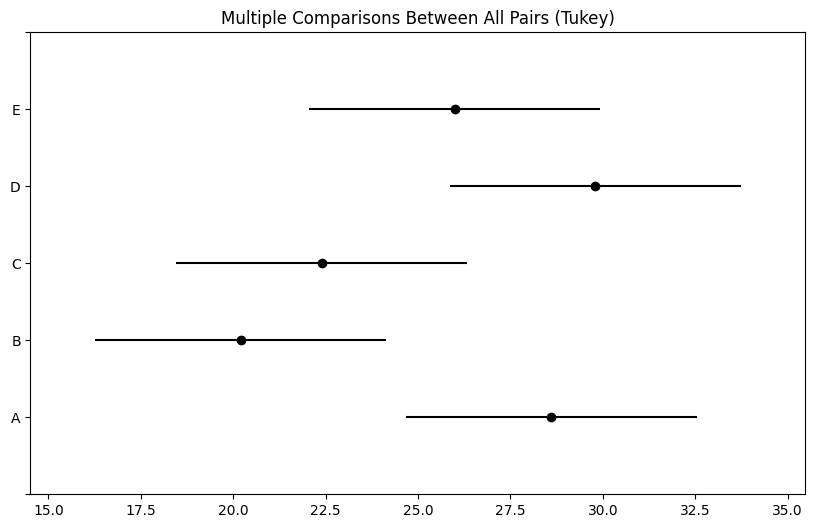

In [120]:
# @title **d. HSD de Tukey Grafico para la diferencia de Medias** "
tukey = pairwise_tukeyhsd(endog=DCGL["Respuesta"],     # Data
                          groups=DCGL["Formulacion"],   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals

tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,7.2,0.2129,-2.5056,16.9056,False
1,3,2.8,0.9069,-6.9056,12.5056,False
1,4,4.6,0.6236,-5.1056,14.3056,False
1,5,5.4,0.4762,-4.3056,15.1056,False
2,3,-4.4,0.6607,-14.1056,5.3056,False
2,4,-2.6,0.9271,-12.3056,7.1056,False
2,5,-1.8,0.98,-11.5056,7.9056,False
3,4,1.8,0.98,-7.9056,11.5056,False
3,5,2.6,0.9271,-7.1056,12.3056,False
4,5,0.8,0.9991,-8.9056,10.5056,False


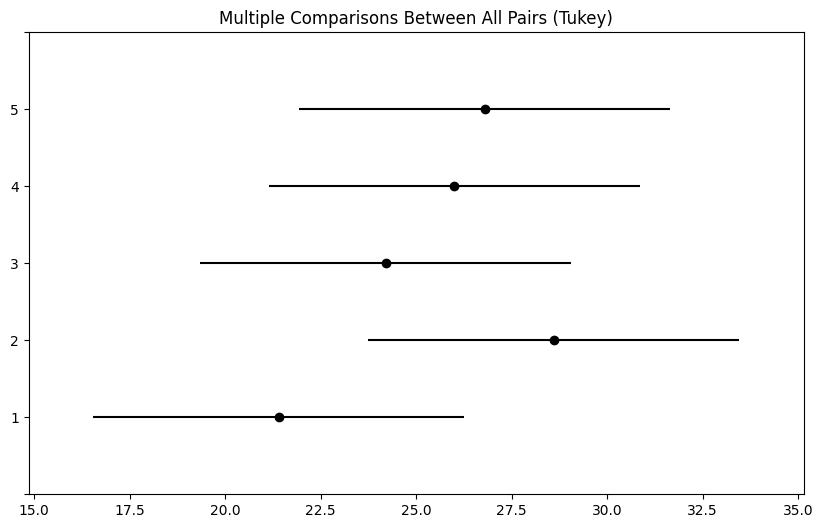

In [121]:
# @title **9. HSD de Tukey Grafico Materia Prime = Lote** "
tukey = pairwise_tukeyhsd(endog=DCGL["Respuesta"],     # Data
                          groups=DCGL["Lote"],   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals

tukey.summary()

In [122]:
# @title **Descriptores numéricos con HSD para Lote**
DCGL3 = DCGL.groupby('Lote')['Respuesta'].agg(['mean', 'std', 'median', 'count'])
DCGL3['HSD'] = HSD
DCGL3

,mean,std,median,count,HSD
Lote,,,,,
1,21.4,3.847077,22.0,5,6.275865
2,28.6,6.913754,30.0,5,6.275865
3,24.2,4.604346,26.0,5,6.275865
4,26.0,2.449490,27.0,5,6.275865
5,26.8,6.457554,24.0,5,6.275865


group1,group2,meandiff,p-adj,lower,upper,reject
1,2,4.6,0.683,-5.8348,15.0348,False
1,3,3.8,0.8097,-6.6348,14.2348,False
1,4,3.4,0.8632,-7.0348,13.8348,False
1,5,4.2,0.7489,-6.2348,14.6348,False
2,3,-0.8,0.9993,-11.2348,9.6348,False
2,4,-1.2,0.9967,-11.6348,9.2348,False
2,5,-0.4,1.0,-10.8348,10.0348,False
3,4,-0.4,1.0,-10.8348,10.0348,False
3,5,0.4,1.0,-10.0348,10.8348,False
4,5,0.8,0.9993,-9.6348,11.2348,False


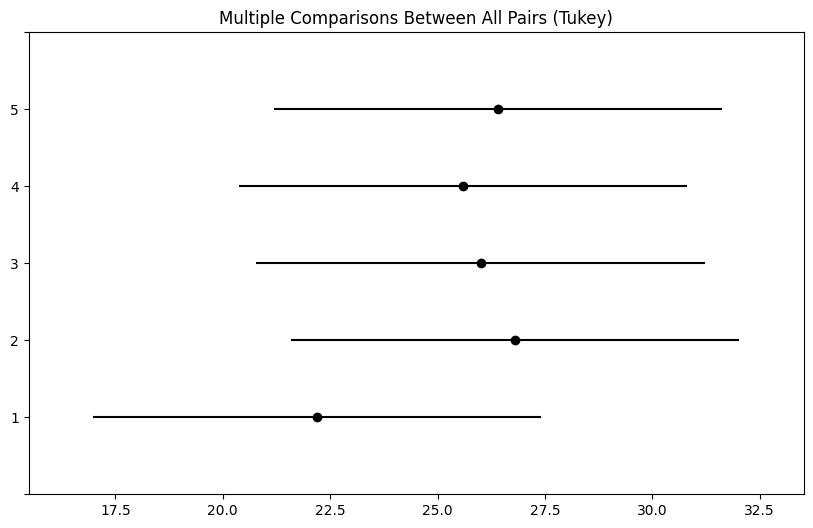

In [123]:
# @title **HSD de Tukey Grafico Materia Prime = Lote**
tukey = pairwise_tukeyhsd(endog=DCGL["Respuesta"],     # Data
                          groups=DCGL["Operador"],   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals

tukey.summary()

In [124]:
# @title **10. Comparaciones Múltiples:  FORMS - 05: HSD**
# Respuesta ~ Formulacion + Montaje + Lote + Operador
import scipy.stats as stats

# Parámetros
alpha = 0.05
k = len(DCGL['Formulacion'].unique())  # Número de grupos
df_error =  modeloDCGL.df_resid  # Grados de libertad del error (N-k)

# Obtener el MSE del modelo
mse = modeloDCGL.mse_resid

n = DCGL.groupby('Formulacion')['Respuesta'].count().mean()

# Calcular el valor crítico del rango studentizado
q_critical = stats.studentized_range.ppf(1 - alpha, k, df_error)
HSD = q_critical * np.sqrt(mse / n)

print(f'Terminos del HSD')
print(f'MSE = {modeloDCGL.mse_resid:.2f}')
print(f"El rango studentizado para alpha = {alpha}, k = {k}, df_error = {df_error} es: q_critical = {q_critical:.2f}")
print(f'HSD teorico de la hipotesis principal es HSD = {HSD:.2f}')



Terminos del HSD
MSE = 8.25
El rango studentizado para alpha = 0.05, k = 5, df_error = 8.0 es: q_critical = 4.89
HSD teorico de la hipotesis principal es HSD = 6.28


In [143]:
# @title **11. Comparaciones Múltiples:  FORMS - 05: LSD**
import numpy as np
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# Respuesta ~ Formulacion + Montaje + Lote + Operador
# Parámetros
alpha = 0.05
k = len(DCGL['Formulacion'].unique())  # Número de grupos (Formulacion)
N = len(DCGL)  # Número total de observaciones
df_error = modeloDCGL.df_resid  # Grados de libertad del error (N-k)

# Obtener el valor crítico t para la prueba LSD
t_critical_LSD = stats.t.ppf(1 - alpha / 2, df_error)

# Obtener el MSE del modelo
mse = modeloDCGL.mse_resid

# Calcular el tamaño de muestra promedio por grupo
n = DCGL.groupby('Formulacion')['Respuesta'].count().mean()

# Calcular la LSD
LSD = t_critical * np.sqrt(2 * mse / n)

print(f'Términos de la LSD')
print(f'el valor de n = {n}')
print(f'MSE = {mse:.2f}')
print(f"El valor crítico t para alpha = {alpha/2}, df_error = {df_error} es: t_critical = {t_critical_LSD:.2f}")
print(f'LSD teórico para la hipótesis principal es LSD = {LSD:.2f}')


Términos de la LSD
el valor de n = 5.0
MSE = 8.25
El valor crítico t para alpha = 0.025, df_error = 8.0 es: t_critical = 2.31
LSD teórico para la hipótesis principal es LSD = 4.19


In [144]:
# @title **12. Previo - Comparaciones Múltiples:  FORMS - 05: HSD y LSD**
DCGL3 = DCGL.groupby('Formulacion')['Respuesta'].agg(['mean', 'std', 'median', 'count'])
DCGL3['HSD'] = HSD
DCGL3['LSD'] = LSD
DCGL3

,mean,std,median,count,HSD,LSD
Formulacion,,,,,,
A,28.6,4.669047,27.0,5,6.275865,4.189065
B,20.2,2.167948,20.0,5,6.275865,4.189065
C,22.4,4.393177,22.0,5,6.275865,4.189065
D,29.8,5.403702,30.0,5,6.275865,4.189065
E,26.0,3.391165,26.0,5,6.275865,4.189065


In [141]:
# @title **13. Previo - Comparaciones Múltiples Ordenadas:  FORMS - 05: HSD y LSD**

DCGL3 = DCGL3.sort_values('mean')

# Display the sorted DataFrame.
print(DCGL3)

             mean       std  median  count       HSD       LSD
Formulacion                                                   
B            20.2  2.167948    20.0      5  6.275865  4.189065
C            22.4  4.393177    22.0      5  6.275865  4.189065
E            26.0  3.391165    26.0      5  6.275865  4.189065
A            28.6  4.669047    27.0      5  6.275865  4.189065
D            29.8  5.403702    30.0      5  6.275865  4.189065


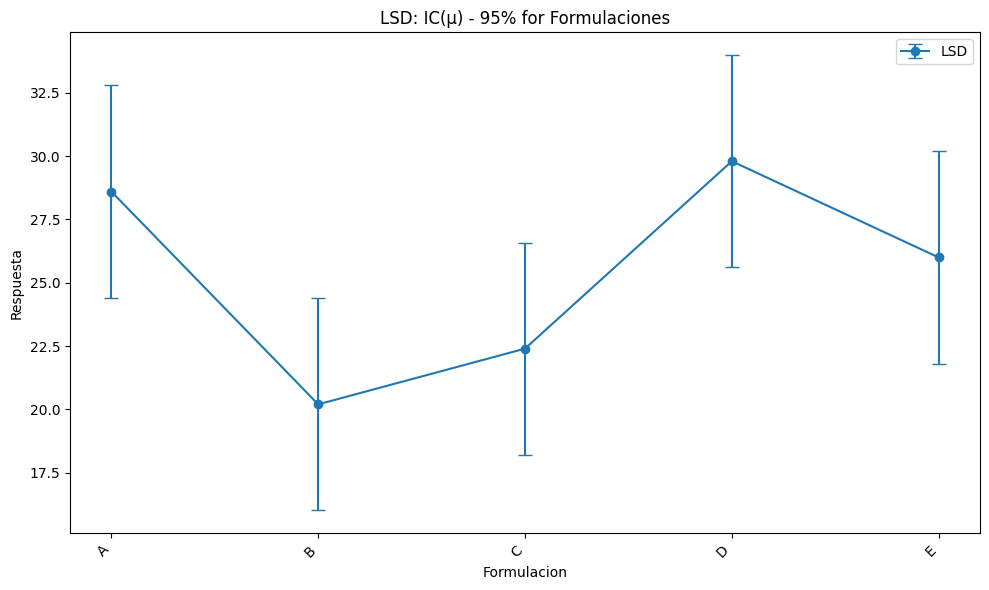

In [162]:
# @title **14. Previo - Comparaciones Múltiples Ordenadas:   'HSD :IC(μ) - 95%'**

# Extract the mean and HSD interval for each group
means = DCGL3['mean']
lower_bounds = [interval[0] for interval in DCGL3['LSD :IC(μ) - 95%']]
upper_bounds = [interval[1] for interval in DCGL3['LSD :IC(μ) - 95%']]
group_names = DCGL3.index

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.errorbar(group_names, means, yerr=[means - lower_bounds, upper_bounds - means],
            fmt='o', capsize=5, linestyle='-', label='LSD')
ax.set_xlabel('Formulacion')
ax.set_ylabel('Respuesta')
ax.set_title('LSD: IC(μ) - 95% for Formulaciones')
ax.legend()
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

In [127]:
# @title **15. Las diferencias entre las medias entre las formulaciones - Caso 2 poblaciones**

# Create a new DataFrame to store the mean differences
mean_differences = pd.DataFrame(columns=['Formulacion 1', 'Formulacion 2', 'Mean Difference', 'Std Error', 't-statistic', 'p-value'])

# Get unique formulaciones
formulaciones = DCGL['Formulacion'].unique()

# Calculate mean differences for all pairs of formulaciones
for i in range(len(formulaciones)):
  for j in range(i + 1, len(formulaciones)):
    form1 = formulaciones[i]
    form2 = formulaciones[j]

    mean1 = DCGL[DCGL['Formulacion'] == form1]['Respuesta'].mean()
    mean2 = DCGL[DCGL['Formulacion'] == form2]['Respuesta'].mean()

    # Perform t-test
    t_statistic, p_value = stats.ttest_ind(DCGL[DCGL['Formulacion'] == form1]['Respuesta'],
                                          DCGL[DCGL['Formulacion'] == form2]['Respuesta'])


    # Calculate standard error (approximation)
    n1 = len(DCGL[DCGL['Formulacion'] == form1])
    n2 = len(DCGL[DCGL['Formulacion'] == form2])
    std1 = DCGL[DCGL['Formulacion'] == form1]['Respuesta'].std()
    std2 = DCGL[DCGL['Formulacion'] == form2]['Respuesta'].std()
    std_error = np.sqrt((std1**2 / n1) + (std2**2 / n2))

    # Store the results in the DataFrame
    new_row = {'Formulacion 1': form1, 'Formulacion 2': form2, 'Mean Difference': round(mean1 - mean2, 2),
               'Std Error': round(std_error, 2), 't-statistic': round(t_statistic, 2), 'p-value': round(p_value, 3)}
    mean_differences = pd.concat([mean_differences, pd.DataFrame([new_row])], ignore_index=True)

# Display the DataFrame
print(mean_differences)


  Formulacion 1 Formulacion 2  Mean Difference  Std Error  t-statistic  \
0             A             B              8.4       2.30         3.65   
1             A             C              6.2       2.87         2.16   
2             A             D             -1.2       3.19        -0.38   
3             A             E              2.6       2.58         1.01   
4             B             C             -2.2       2.19        -1.00   
5             B             D             -9.6       2.60        -3.69   
6             B             E             -5.8       1.80        -3.22   
7             C             D             -7.4       3.11        -2.38   
8             C             E             -3.6       2.48        -1.45   
9             D             E              3.8       2.85         1.33   

   p-value  
0    0.007  
1    0.063  
2    0.717  
3    0.343  
4    0.345  
5    0.006  
6    0.012  
7    0.045  
8    0.185  
9    0.220  


<ipython-input-127-b9cca898bd01>:33: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  mean_differences = pd.concat([mean_differences, pd.DataFrame([new_row])], ignore_index=True)


In [149]:
# @title **16. las diferencias entre las medias entre las formulaciones - HSD y LSD**

# Create a new DataFrame to store the mean differences
mean_differences2 = pd.DataFrame(columns=['Formulacion 1', 'Formulacion 2', 'Mean Difference', 't_critical_LSD', 'LSD', 'q_critical', 'HSD', ])

# Get unique formulaciones
formulaciones = DCGL['Formulacion'].unique()

# Calculate mean differences for all pairs of formulaciones
for i in range(len(formulaciones)):
  for j in range(i + 1, len(formulaciones)):
    form1 = formulaciones[i]
    form2 = formulaciones[j]

    mean1 = DCGL[DCGL['Formulacion'] == form1]['Respuesta'].mean()
    mean2 = DCGL[DCGL['Formulacion'] == form2]['Respuesta'].mean()


    q_critical = stats.studentized_range.ppf(1 - alpha, k, df_error)
    HSD = q_critical * np.sqrt(mse / n)

    # Calculate standard error (approximation)
    n1 = len(DCGL[DCGL['Formulacion'] == form1])
    n2 = len(DCGL[DCGL['Formulacion'] == form2])
    std1 = DCGL[DCGL['Formulacion'] == form1]['Respuesta'].std()
    std2 = DCGL[DCGL['Formulacion'] == form2]['Respuesta'].std()
    std_error = np.sqrt((std1**2 / n1) + (std2**2 / n2))

    # Store the results in the DataFrame
    new_row = {'Formulacion 1': form1, 'Formulacion 2': form2, 'Mean Difference': round(mean1 - mean2, 2),
               't_critical_LSD': round(t_critical_LSD, 2), 'q_critical': round(q_critical, 2), 'LSD':LSD, 'HSD': HSD}
    mean_differences2 = pd.concat([mean_differences2, pd.DataFrame([new_row])], ignore_index=True)

# Display the DataFrame
print(mean_differences2)


<ipython-input-149-563f1990fb0e>:32: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  mean_differences2 = pd.concat([mean_differences2, pd.DataFrame([new_row])], ignore_index=True)


  Formulacion 1 Formulacion 2  Mean Difference  t_critical_LSD       LSD  \
0             A             B              8.4            2.31  4.189065   
1             A             C              6.2            2.31  4.189065   
2             A             D             -1.2            2.31  4.189065   
3             A             E              2.6            2.31  4.189065   
4             B             C             -2.2            2.31  4.189065   
5             B             D             -9.6            2.31  4.189065   
6             B             E             -5.8            2.31  4.189065   
7             C             D             -7.4            2.31  4.189065   
8             C             E             -3.6            2.31  4.189065   
9             D             E              3.8            2.31  4.189065   

   q_critical       HSD  
0        4.89  6.275865  
1        4.89  6.275865  
2        4.89  6.275865  
3        4.89  6.275865  
4        4.89  6.275865  
5      

In [150]:
# @title **17. Calcula los intervalos de confianza para HSD y LSD**
mean_differences2['HSD :IC(μ) - 95%'] = mean_differences2.apply(lambda row: (round(row['Mean Difference'] - HSD, 2), round(row['Mean Difference'] + HSD, 2)), axis=1)
mean_differences2['LSD :IC(μ) - 95%'] = mean_differences2.apply(lambda row: (round(row['Mean Difference'] - LSD, 2), round(row['Mean Difference'] + LSD, 2)), axis=1)

mean_differences2

,Formulacion 1,Formulacion 2,Mean Difference,t_critical_LSD,LSD,q_critical,HSD,HSD :IC(μ) - 95%,LSD :IC(μ) - 95%
0,A,B,8.4,2.31,4.189065,4.89,6.275865,"(2.12, 14.68)","(4.21, 12.59)"
1,A,C,6.2,2.31,4.189065,4.89,6.275865,"(-0.08, 12.48)","(2.01, 10.39)"
2,A,D,-1.2,2.31,4.189065,4.89,6.275865,"(-7.48, 5.08)","(-5.39, 2.99)"
3,A,E,2.6,2.31,4.189065,4.89,6.275865,"(-3.68, 8.88)","(-1.59, 6.79)"
4,B,C,-2.2,2.31,4.189065,4.89,6.275865,"(-8.48, 4.08)","(-6.39, 1.99)"
5,B,D,-9.6,2.31,4.189065,4.89,6.275865,"(-15.88, -3.32)","(-13.79, -5.41)"
6,B,E,-5.8,2.31,4.189065,4.89,6.275865,"(-12.08, 0.48)","(-9.99, -1.61)"
7,C,D,-7.4,2.31,4.189065,4.89,6.275865,"(-13.68, -1.12)","(-11.59, -3.21)"
8,C,E,-3.6,2.31,4.189065,4.89,6.275865,"(-9.88, 2.68)","(-7.79, 0.59)"
9,D,E,3.8,2.31,4.189065,4.89,6.275865,"(-2.48, 10.08)","(-0.39, 7.99)"


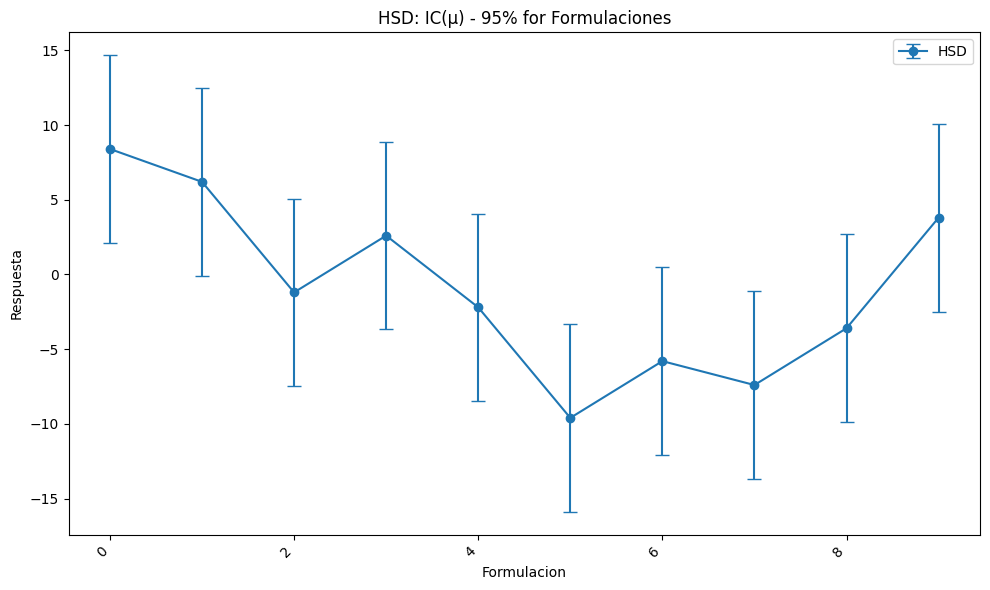

In [160]:
import matplotlib.pyplot as plt

# @title **18. Intervalos de condianza para la diferencia 'HSD :IC(μ) - 95%'**

# Extract the mean and HSD interval for each group
means = mean_differences2['Mean Difference']
# Get the lower and upper bounds directly from mean_differences2
lower_bounds = [interval[0] for interval in mean_differences2['HSD :IC(μ) - 95%']]
upper_bounds = [interval[1] for interval in mean_differences2['HSD :IC(μ) - 95%']]
group_names = mean_differences2.index

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.errorbar(group_names, means, yerr=[means - lower_bounds, upper_bounds - means],
            fmt='o', capsize=5, linestyle='-', label='HSD')
ax.set_xlabel('Formulacion')
ax.set_ylabel('Respuesta')
ax.set_title('HSD: IC(μ) - 95% for Formulaciones')
ax.legend()
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

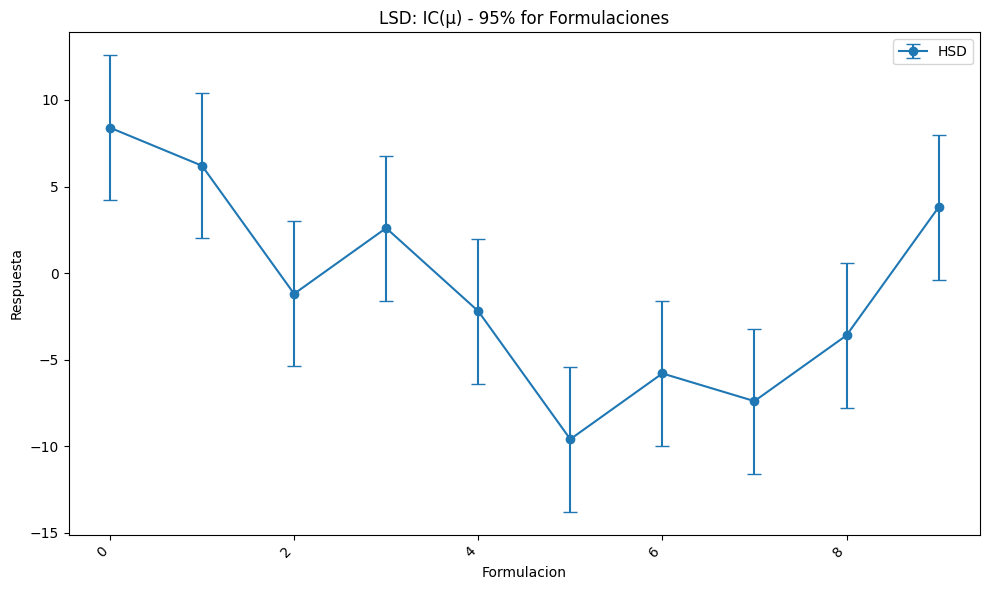

In [161]:
import matplotlib.pyplot as plt

# @title **19. Intervalos de condianza para la diferencia 'LSD :IC(μ) - 95%'**

# Extract the mean and HSD interval for each group
means = mean_differences2['Mean Difference']

# Get the lower and upper bounds directly from mean_differences2
lower_bounds = [interval[0] for interval in mean_differences2['LSD :IC(μ) - 95%']]
upper_bounds = [interval[1] for interval in mean_differences2['LSD :IC(μ) - 95%']]
group_names = mean_differences2.index

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.errorbar(group_names, means, yerr=[means - lower_bounds, upper_bounds - means],
            fmt='o', capsize=5, linestyle='-', label='HSD')
ax.set_xlabel('Formulacion')
ax.set_ylabel('Respuesta')
ax.set_title('LSD: IC(μ) - 95% for Formulaciones')
ax.legend()
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

## **20 Supuestos del Modelo**
# **a. Forma 1. Shapiro Wilks**

In [133]:
# **a. Forma 1. Shapiro Wilks**
stats.shapiro(modeloDCGL.resid)

ShapiroResult(statistic=0.9796737494354418, pvalue=0.8785633364790242)

# **b. Prueba gráfica con el gráfico de probabilidad Normal y el Histograma**

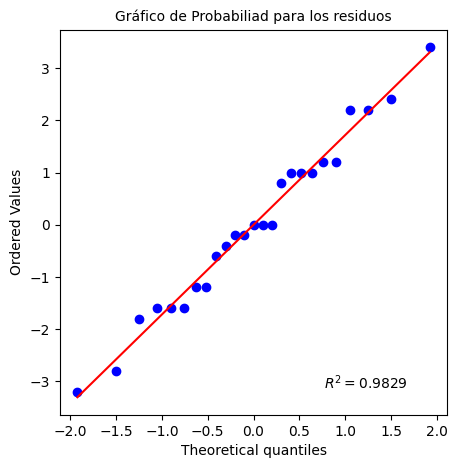

In [134]:
# **b. Prueba gráfica con el gráfico de probabilidad Normal y el Histograma**
fig = plt.figure(figsize= (5, 5))
ax = fig.add_subplot(111)
normality_plot, stat = stats.probplot(modeloDCGL.resid, plot= plt, rvalue= True)
ax.set_title("Gráfico de Probabiliad para los residuos", fontsize= 10)
ax.set

plt.show()

## **e. Homocedasticidad de los residuos: Usando la prueba de Levene**

In [135]:
# e. Homocedasticidad de los residuos: Usando la prueba de Levene Respuesta ~ Formulacion + Montaje + Lote + Operador
stats.levene(DCGL['Respuesta'][DCGL['Formulacion'] == 'A'],
             DCGL['Respuesta'][DCGL['Formulacion'] == 'B'],
             DCGL['Respuesta'][DCGL['Formulacion'] == 'C'],
             DCGL['Respuesta'][DCGL['Formulacion'] == 'D'],
             DCGL['Respuesta'][DCGL['Formulacion'] == 'E'])

LeveneResult(statistic=0.5858310626702997, pvalue=0.6765774278751369)

In [136]:
# e. Homocedasticidad de los residuos: Usando la prueba de Levene Respuesta ~ Formulacion + Montaje + Lote + Operador
stats.levene(DCGL['Respuesta'][DCGL['Montaje'] == 'α'],
             DCGL['Respuesta'][DCGL['Montaje'] == 'γ'],
             DCGL['Respuesta'][DCGL['Montaje'] == 'ε'],
             DCGL['Respuesta'][DCGL['Montaje'] == 'β'],
             DCGL['Respuesta'][DCGL['Montaje'] == 'δ'])

LeveneResult(statistic=0.9393939393939392, pvalue=0.46150156070186776)

In [137]:
# e. Homocedasticidad de los residuos: Usando la prueba de Levene Respuesta ~ Formulacion + Montaje + Lote + Operador
stats.levene(DCGL['Respuesta'][DCGL['Lote'] == 1],
             DCGL['Respuesta'][DCGL['Lote'] == 2],
             DCGL['Respuesta'][DCGL['Lote'] == 3],
             DCGL['Respuesta'][DCGL['Lote'] == 4],
             DCGL['Respuesta'][DCGL['Lote'] == 5])

LeveneResult(statistic=0.7370184254606365, pvalue=0.5776454631945196)

In [138]:
# e. Homocedasticidad de los residuos: Usando la prueba de Levene Respuesta ~ Formulacion + Montaje + Lote + Operador
stats.levene(DCGL['Respuesta'][DCGL['Operador'] == 1],
             DCGL['Respuesta'][DCGL['Operador'] == 2],
             DCGL['Respuesta'][DCGL['Operador'] == 3],
             DCGL['Respuesta'][DCGL['Operador'] == 4],
             DCGL['Respuesta'][DCGL['Operador'] == 5])

LeveneResult(statistic=0.8196022727272727, pvalue=0.5278203854420218)